In [4]:
import matplotlib.pyplot as plot
import numpy as np

In [1]:
import re

models = ['lstm']
data_ratios = ['25', '50', '75', '100']

data = {}

for model in models:
    data[model] = {}
    for ratio in data_ratios:
        data[model][ratio] = {}
        file_name = f'./{model}{ratio}.txt'
        with open(file_name, 'r') as f:
            for line in f:
                line = line.strip()
                result = re.findall(r'epoch: (\d+), train loss: (.*), train acc: (.*), val loss: (.*), val acc: (.*),  time:.*', line)
                if result:
                    epoch, train_loss, train_acc, val_loss, val_acc = result[0]
                    meta_data = {
                        'train loss': float(train_loss),
                        'train acc': float(train_acc),
                        'val loss': float(val_loss),
                        'val acc': float(val_acc)
                    }
                    data[model][ratio][int(epoch)] = meta_data

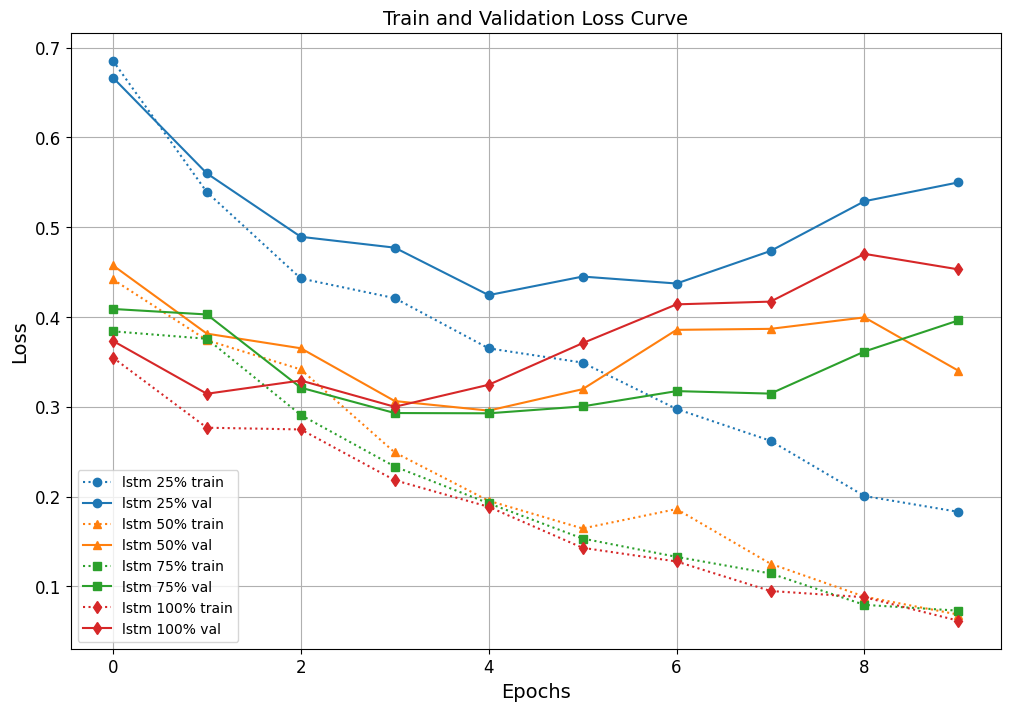

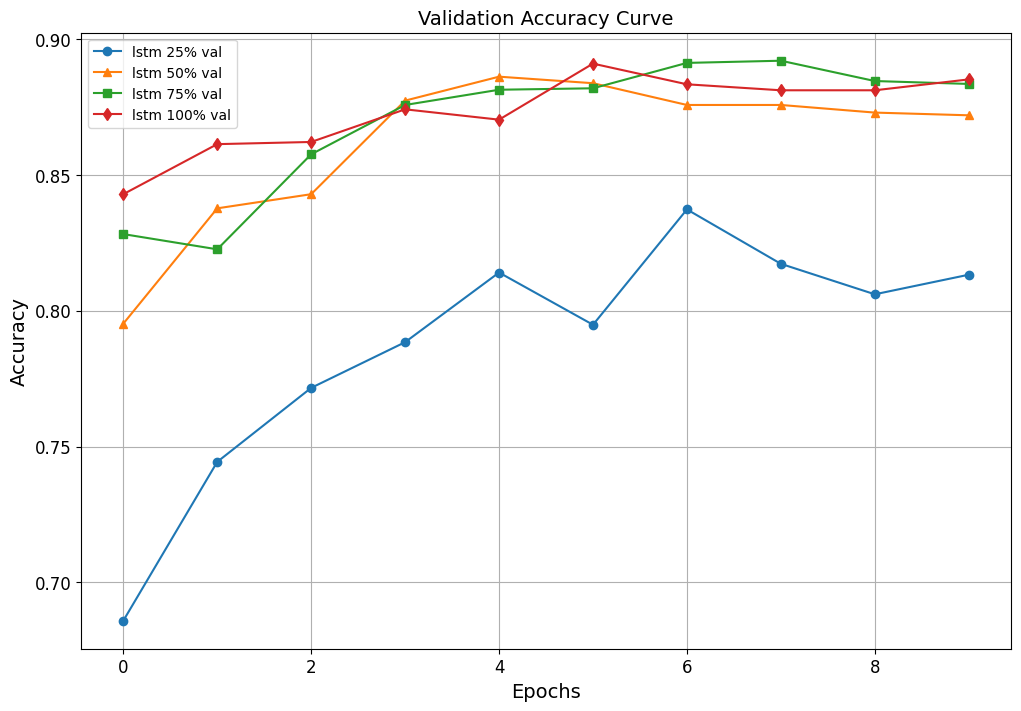

In [2]:
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', '^', 's', 'd']

fig1, ax1 = plt.subplots(figsize=(12, 8))
fig2, ax2 = plt.subplots(figsize=(12, 8))

for i, model in enumerate(models):
    for j, ratio in enumerate(data_ratios):
        meta_data = data[model][ratio]
        epochs = sorted(meta_data.keys())
        train_losses = [meta_data[e]['train loss'] for e in epochs]
        val_losses = [meta_data[e]['val loss'] for e in epochs]
        val_accs = [meta_data[e]['val acc'] for e in epochs]
        label = f'{model} {ratio}%'
        
        # train and val loss
        ax1.plot(epochs, train_losses, color=colors[j], marker=markers[j], label=f'{label} train', linestyle='dotted')
        ax1.plot(epochs, val_losses, color=colors[j], marker=markers[j], label=f'{label} val')
        # val accuracy
        ax2.plot(epochs, val_accs, color=colors[j], marker=markers[j], label=f'{label} val')

# set titles and x,y labels
for ax in [ax1, ax2]:
    ax.set_xlabel('Epochs', fontsize=14)
    ax.set_ylabel('Loss' if ax == ax1 else 'Accuracy', fontsize=14)
    # title = 'Train and Validation Loss Curve' if ax == ax1 else 'Train and Validation Accuracy Curve'
    title = 'Train and Validation Loss Curve' if ax == ax1 else 'Validation Accuracy Curve'
    ax.set_title(title, fontsize=14)
    ax.grid(True)

    # set ticker label fontsize
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    # add legend
    ax.legend(prop={'size': 10})
    

plt.show()